In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io, color
from skimage.transform import resize
import math


https://github.com/laixintao/slic-python-implementation/blob/master/slic.py
https://github.com/darshitajain/SLIC/blob/master/SLIC_Algorithm.ipynb

In [12]:
from utils.slic import SLICProcessor
from utils.color_entropy import calculate_color_entropy

In [3]:
img_dir = "./data/sample3.jpg"
p = SLICProcessor(img_dir, 16, 40)
p.iterate_10times()

100%|██████████| 10/10 [02:17<00:00, 13.71s/it]


In [28]:
img_dir = "./data/downloaded/ericcahan/Alamar, Ciudad De La Habana, Cuba - Sunset 8:11pm.jpg"

In [17]:
img_dir = "./data/downloaded/ericcahan/Dune Road, Southampton, NY - Sunset 7:33pm.jpg"
calculate_color_entropy(img_dir)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 14, 54, 261, 287, 399, 485, 510, 653, 1016, 1109, 1304, 1356, 1947, 1457, 1626, 1815, 2161, 2539, 2824, 6521, 74581, 99246, 45023, 33357, 42217, 36576, 58240, 37229, 42521, 46254, 62439, 71338, 59369, 65120, 34818, 1980, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

5.543912499801673

In [18]:
def get_df_rgb(img):
    image = img
    if isinstance(img, str):
        image = Image.open(img)
    
    n_dims = np.array(image).shape[-1]
    r, g, b = np.array(image).reshape(-1, n_dims).T
    # return pd.DataFrame({'r': r, 'g': g, 'b': b}).sample(n=sample_size)
    return pd.DataFrame({'r': r, 'g': g, 'b': b})
    

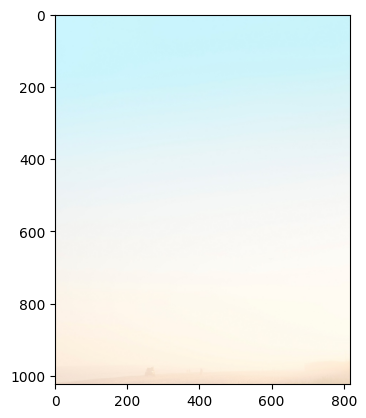

(838656, 3)


In [19]:
File_name = mpimg.imread(img_dir)
plt.imshow(File_name)
plt.show()

# plt.imshow(image)
# image.show()
rgb_values = get_df_rgb(File_name)
print(rgb_values.shape)

In [20]:
rgb_array = rgb_values.values

# Initialize the PCA model with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(rgb_array)

# Transform the RGB values to the first two principal components
pca_components = pca.transform(rgb_array)


In [21]:
print(pca_components)

[[ 34.30158572  -0.27289571]
 [ 34.30158572  -0.27289571]
 [ 34.30158572  -0.27289571]
 ...
 [-15.92816109  63.49037191]
 [-15.92816109  63.49037191]
 [-15.92816109  63.49037191]]


In [22]:
len(pca_components)
first_component = pca_components[:, 0]
first_component.shape

(838656,)

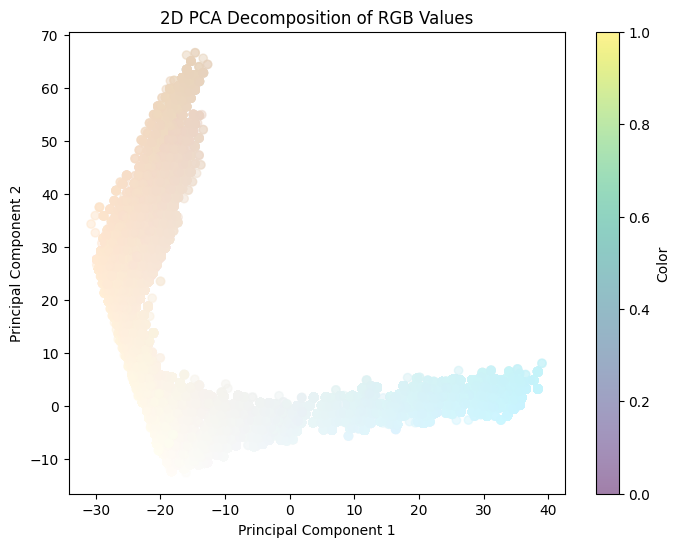

In [23]:
# Create a DataFrame for the transformed PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot the 2D PCA decomposition with colored points
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=rgb_array/255.0, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Decomposition of RGB Values')
plt.colorbar(label='Color')
plt.show()

In [10]:
from sklearn.cluster import KMeans

palette_size = 5
model = KMeans(n_clusters=palette_size)
clusters = model.fit_predict(rgb_values)

palette = model.cluster_centers_.astype(int).tolist()

/Users/hunkim/anaconda3/envs/gan/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
ndArray = np.array(palette, dtype=np.float32)
outImg = Image.fromarray(ndArray)
# outImg.save('./image.jpg')
print(ndArray)


[[ 87. 139. 177.]
 [  3.  78. 134.]
 [240. 163. 126.]
 [177. 183. 192.]
 [150.  91. 105.]]


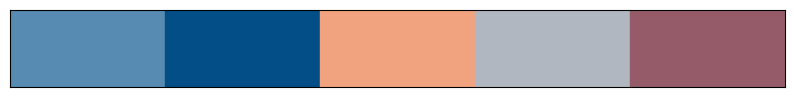

In [12]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 1))

# Set axis limits
ax.set_xlim(0, len(palette))
ax.set_ylim(0, 1)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Create colored squares for each RGB value
for i, rgb in enumerate(palette):
    color = [comp / 255.0 for comp in rgb]  # Normalize to [0, 1] range
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Display the color row
plt.show()

In [ ]:
import numpy as np
import random

class Custom_KMeans:
    def __init__(self, n_clusters, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state

    def fit(self, data):
        self.centroids = self.initialize_centroids(data)
        self.average_rgb = np.mean(data, axis=0)
        
        for _ in range(self.max_iters):
            clusters = self.assign_clusters(data)
            new_centroids = self.calculate_new_centroids(data, clusters)
            
            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids
        
    def initialize_centroids(self, data):
        if self.random_state is not None:
            random.seed(self.random_state)
        random_indices = random.sample(range(len(data)), self.n_clusters)
        centroids = data[random_indices]
        return centroids
    
    def assign_clusters(self, data):
        clusters = np.zeros(len(data))
        for i, point in enumerate(data):
            # calculate the distance between each point and each centroid
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # each pixel is assigned a pixel index of the closest centroid
            clusters[i] = np.argmin(distances)
        return clusters
    
    def calculate_new_centroids(self, data, clusters):
        # new centroids are the mean of all points in the cluster
        new_centroids = np.array([data[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
        return new_centroids


In [70]:
from PIL import Image, ImageDraw
import numpy as np
from sklearn.cluster import KMeans

def calculate_intermediate_colors(colors, num_colors):
    gradient_colors = []
    
    for i in range(num_colors):
        t = i / (num_colors - 1)
        interpolated_color = tuple(int(colors[0][c] * (1 - t) + colors[1][c] * t) for c in range(3))
        gradient_colors.append(interpolated_color)
    
    return gradient_colors

def extract_key_colors_kmeans(image_path, num_colors):
    image = Image.open(image_path)
    image_array = np.array(image)
    h, w, d = image_array.shape
    image_flatten = image_array.reshape(h * w, d)

    kmeans = KMeans(n_clusters=num_colors, random_state=0)
    kmeans.fit(image_flatten)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the average squared distance for each cluster center
    avg_squared_distances = []
    for i in range(num_colors):
        points_in_cluster = image_flatten[kmeans.labels_ == i]
        distances = np.linalg.norm(points_in_cluster - cluster_centers[i], axis=1)
        avg_squared_distance = np.mean(distances ** 2)
        print(avg_squared_distance)
        avg_squared_distances.append(avg_squared_distance)

    sorted_indices = np.argsort(avg_squared_distances)
    sorted_cluster_centers = cluster_centers[sorted_indices]
    key_colors = sorted_cluster_centers.astype(int)
    
    return key_colors

def create_color_gradient_key_colors(key_colors, gradient_width, gradient_height):
    # gradient_colors = calculate_intermediate_colors(key_colors, len(key_colors))
    gradient_colors = [tuple(color) for color in key_colors]
    
    gradient_palette = Image.new("RGB", (gradient_width, gradient_height))
    draw = ImageDraw.Draw(gradient_palette)
    
    color_width = gradient_width / len(gradient_colors)
    for i, color in enumerate(gradient_colors):
        draw.rectangle([(i * color_width, 0), ((i + 1) * color_width, gradient_height)], fill=color)
    
    return gradient_palette

input_image_path = "./data/downloaded/ericcahan/Alamar, Ciudad De La Habana, Cuba - Sunset 8:11pm.jpg"
# input_image_path = "./data/Lenna.png"
output_gradient_width = 1000
output_gradient_height = 100
num_colors_in_gradient = 20

key_colors = extract_key_colors_kmeans(input_image_path, num_colors_in_gradient)
gradient_image = create_color_gradient_key_colors(key_colors, output_gradient_width, output_gradient_height)
gradient_image.show()

/Users/hunkim/anaconda3/envs/gan/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


439.84564645658304
919.5335589742259
1024.8019512191067
1424.4901993570024
976.0928536375498


In [53]:
from PIL import Image, ImageDraw
import numpy as np
from sklearn.cluster import KMeans
from utils.custom_kmeans import Custom_KMeans

def calculate_intermediate_colors(start_color, end_color, num_colors):
    colors = []
    
    for i in range(num_colors):
        t = i / (num_colors - 1)
        r = int(start_color[0] * (1 - t) + end_color[0] * t)
        g = int(start_color[1] * (1 - t) + end_color[1] * t)
        b = int(start_color[2] * (1 - t) + end_color[2] * t)
        colors.append((r, g, b))
    
    return colors

def extract_key_colors(image, num_colors):
    # image array is of shape (height, width, 3)
    image_array = np.array(image)
    # image_flatten is of shape (height * width, 3)
    image_flatten = image_array.reshape(-1, 3)
    
    # get image average color
    image_average_color = np.mean(image_flatten, axis=0)

    kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(image_flatten)
    cluster_labels = kmeans.labels_
    # Initialize an empty list for each cluster
    cluster_points = [[] for _ in range(num_colors)]

    # Assign data points to their respective clusters
    for i, label in enumerate(cluster_labels):
        cluster_points[label].append(image_flatten[i])

    # Convert cluster points to numpy arrays
    cluster_points_np = [np.array(points) for points in cluster_points]

    key_colors = []
    # Find the farthest point from the average color in each cluster
    for cluster in cluster_points_np:
        farthest_point_idx = np.argmax(np.linalg.norm(cluster - image_average_color, axis=1))
        farthest_point = cluster[farthest_point_idx]
        key_colors.append(farthest_point)

    # print(cluster_points_np[0].shape) # (num_points_in_cluster, 3)
    # key_colors = kmeans.cluster_centers_.astype(int)
    print(key_colors)
    
    return key_colors

def extract_color_gradient(image_path, num_colors, gradient_width, gradient_height):
    image = Image.open(image_path)
    
    key_colors = extract_key_colors(image, num_colors)
    
    gradient_colors = calculate_intermediate_colors(key_colors[0], key_colors[1], num_colors)
    
    gradient_palette = Image.new("RGB", (gradient_width, gradient_height))
    draw = ImageDraw.Draw(gradient_palette)
    
    color_width = gradient_width / num_colors
    for i, color in enumerate(gradient_colors):
        draw.rectangle([(i * color_width, 0), ((i + 1) * color_width, gradient_height)], fill=color)
    
    return gradient_palette

img_dir = "./data/downloaded/ericcahan/Alamar, Ciudad De La Habana, Cuba - Sunset 8:11pm.jpg"
input_image_path = img_dir
output_gradient_width = 1000
output_gradient_height = 100
num_colors_in_gradient = 100

gradient_image = extract_color_gradient(input_image_path, num_colors_in_gradient, output_gradient_width, output_gradient_height)
gradient_image.show()
gradient_image.save(img_dir + 'gradient.png')

/Users/hunkim/anaconda3/envs/gan/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[array([255, 188, 141], dtype=uint8), array([  0,  89, 149], dtype=uint8), array([128, 167, 200], dtype=uint8), array([156,  80,  92], dtype=uint8), array([202, 203, 207], dtype=uint8), array([ 82, 144, 183], dtype=uint8), array([  0,  66, 126], dtype=uint8), array([ 36, 128, 169], dtype=uint8), array([255, 169,  84], dtype=uint8), array([222, 104,  90], dtype=uint8), array([225, 178, 158], dtype=uint8), array([255, 168, 112], dtype=uint8), array([91, 61, 99], dtype=uint8), array([155, 186, 204], dtype=uint8), array([190, 185, 182], dtype=uint8), array([231, 195, 183], dtype=uint8), array([  0,  77, 136], dtype=uint8), array([112, 160, 196], dtype=uint8), array([ 16, 114, 159], dtype=uint8), array([255, 123, 120], dtype=uint8), array([255, 168, 137], dtype=uint8), array([189, 112, 128], dtype=uint8), array([109,  69, 106], dtype=uint8), array([103, 155, 192], dtype=uint8), array([ 44, 129, 170], dtype=uint8), array([213, 185, 181], dtype=uint8), array([255, 183,  98], dtype=uint8), arr